#VERSION 1 IMPLEMENTACION DE KMEANS LIBRERIA SKLEARN

##Importar librerias

In [1]:
import numpy as np #Manejo de arreglos  (Algebra Lineal en Python)
import pandas as pd ## Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas estadísticvas (histogramas)
import matplotlib.cm as cm #Colores de graficas

##Extraccion de datos

In [2]:
### Publicar los datos en la web
url2='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_GsMiCteAs0MUDzRzN-Z_z6WBx5-hAlhTJjOLpsrC2HM0UMHbbDpB14u6AGb8f_ek1A5X-lxhuO6K/pub?gid=1130509824&single=true&output=csv'
data= pd.read_csv(url2) ##COn libreria pandas se lee la url y se extrae como 'datos'
data.head(15)  #.head para mostrar el encabezado del codigo

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW
5,Kevin De Bruyne,90,67,87,94,87,65,78,67,67,...,4,33,NaN,NaN,NaN,NaN,NaN,Right,Belgium,CM
6,Harry Kane,90,65,93,84,83,49,82,64,66,...,3,31,NaN,NaN,NaN,NaN,NaN,Right,England,ST
7,Martin Ødegaard,89,70,82,89,89,67,66,72,69,...,5,25,NaN,NaN,NaN,NaN,NaN,Left,Norway,CM
8,Gianluigi Donnarumma,89,90,84,73,90,52,87,50,55,...,1,25,90.0,84.0,73.0,87.0,90.0,Right,Italy,GK
9,Alisson,89,86,85,85,89,56,90,60,49,...,1,31,86.0,85.0,85.0,90.0,89.0,Right,Brazil,GK


In [3]:
##tamaño de los datos
data.shape

(17737, 48)

In [4]:
data.isna().sum()#saber datos faltantes

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [5]:
gk_columns=['GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']#crear lista que contiene los datos faltantes
# median para sacar la mediana, sort_values orgnizarlo de manera ascendente y index para mostrar solo los encabezados
data[gk_columns]=data[gk_columns].fillna(0)#remplazar los datos faltantes con 0

In [6]:
#Asignamos a X y Y los datos
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values #con el iloc se acceden a los datos, primero filas luego columnas, : en fila significa todas, en columnas desde la 1 hasta la -1, sin inluir la ultima

Y

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [7]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Crear el codificador
le = LabelEncoder()

# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Codificar la última columna (Skill moves)
X[:, -1] = le.fit_transform(X[:, -1])

# Verificar los resultados
print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [8]:
df = pd.DataFrame(X) # Convertir 'X' a un DataFrame de pandas

for col in df.columns: # Iterar sobre cada columna del DataFrame

    # Convertir a numérico, forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median') #A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X)
X = imputer.transform(X)
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

##FUNCION CODO PARA DEFINIR CUANTOS CLUSTER USAR

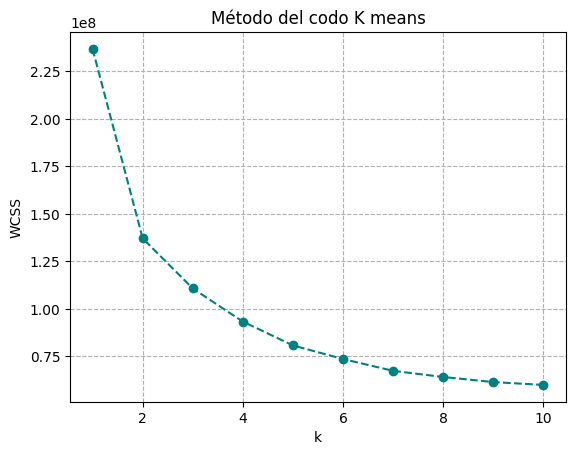

In [10]:
from sklearn.cluster import KMeans
## Inicializo donde almaceno el WCCS(k)
WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               #init = 'k-means++',
               random_state=42, n_init = 'auto')
  kpp.fit(X)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'teal')
plt.title('Método del codo K means')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

##Implementacion kmeans

**Preparacion de datos**

In [11]:
#Se elimino la nacionalidad para evitar ruido del grafico
X_ = X[:,:-1]
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [12]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median')#A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X_)
X_ = imputer.transform(X_)

**Implementacion de kmeans**

In [13]:
from sklearn.cluster import KMeans #algoritmo clasificacion

kmeans = KMeans(n_clusters=4, random_state=42) #se define el numero de clusters en este caso son 4
clusters = kmeans.fit_predict(X_) #otorgando el N. de etiquedas de n_clusters

In [14]:
# Añadir los clusters al DataFrame original
data['Cluster'] = clusters  # Agrega la columna 'Cluster' al DataFrame original

print(data[['Name', 'Nation', 'Cluster']].head())  # Muestra los primeros resultados

              Name   Nation  Cluster
0    Kylian Mbappé   France        0
1            Rodri    Spain        3
2   Erling Haaland   Norway        3
3  Jude Bellingham  England        3
4         Vini Jr.   Brazil        0


**PCA**

In [15]:
from sklearn.decomposition import PCA

# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

##Visualizacion

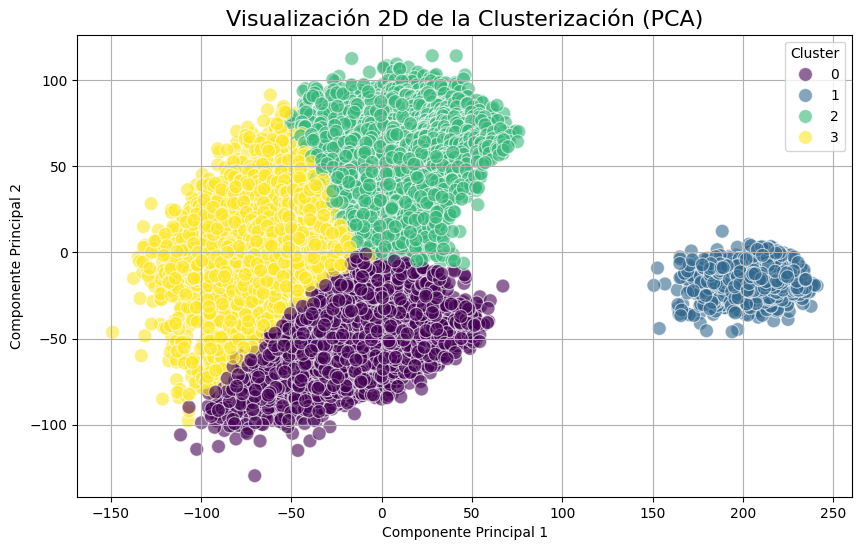

In [16]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
##creamos la grafica con X_
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6, s=100)  # Ajustar el tamaño de los puntos

plt.title('Visualización 2D de la Clusterización (PCA)', fontsize=16) #titulo
plt.xlabel('Componente Principal 1') #etiqueta a eje x
plt.ylabel('Componente Principal 2') #etiqueta a eje y
plt.grid(True) #ponemos una rejilla
plt.legend(title='Cluster') #ponemos legenda con titulo de cluster
plt.show() #mostrar

**VISUALIZACIÓN 3D**

<ipython-input-17-0b3a54bf726a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores


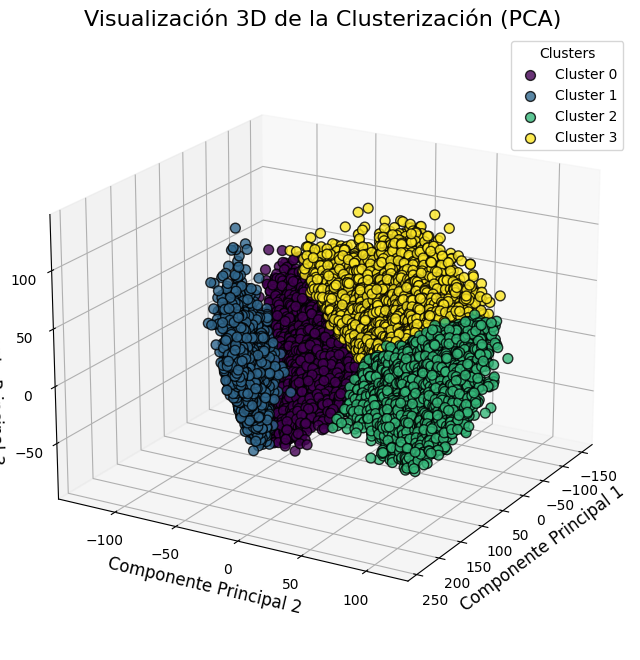

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Definir una paleta de colores para los clusters
unique_clusters = np.unique(clusters)  # Obtener los clusters únicos
colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores

# Crear un gráfico de dispersión 3D
fig = plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un objeto de eje 3D

# Graficar cada cluster con un color sólido
for cluster in unique_clusters:  # Recorrer los clusters únicos
    ax.scatter(X_pca[clusters == cluster, 0],
               X_pca[clusters == cluster, 1],
               X_pca[clusters == cluster, 2],
               color=colors(cluster),  # Usar el color correspondiente al cluster
               label=f'Cluster {cluster}',
               s=50, alpha=0.8, edgecolor='k')  # Ajustar el tamaño de los puntos

# Etiquetas y título
ax.set_title('Visualización 3D de la Clusterización (PCA)', fontsize=16)  # Título
ax.set_xlabel('Componente Principal 1', fontsize=12)  # Etiquetas de los ejes x
ax.set_ylabel('Componente Principal 2', fontsize=12)  # Etiquetas de los ejes y
ax.set_zlabel('Componente Principal 3', fontsize=12)  # Etiquetas de los ejes z

# Leyenda
ax.legend(title='Clusters', fontsize=10)  # Título de la leyenda

# Ajustar la vista
ax.view_init(elev=20, azim=30)  # Ajusta la elevación y la azimutal
plt.show() #Mostar